# **Student Stress Level Prediction using Machine Learning**



In [ ]:
# Name: Md. Jihadul Amin (ID: 24241200)
# Name: Anika Bushra (ID: 21201068)
# CSE422 (Section: 12)
# Fall 2024

# Dataset & Libraries used

### **Dataset Link:** [StressLevelDataset](https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Upload dataset file here
from google.colab import files
uploaded = files.upload()

In [5]:
data = pd.read_csv('StressLevelDataset.csv')

In [6]:
# Adding null values to the dataset for preprocessing demonstration purposes

def mark_zero_as_null(df, columns):
    df[columns] = df[columns].replace(0, np.nan)
    return df

columns_to_replace = ['breathing_problem', 'basic_needs','extracurricular_activities','noise_level']
data = mark_zero_as_null(data, columns_to_replace)

print(data.isnull().sum())

anxiety_level                    0
self_esteem                      0
mental_health_history            0
depression                       0
headache                         0
blood_pressure                   0
sleep_quality                    0
breathing_problem               43
noise_level                     36
living_conditions                0
safety                           0
basic_needs                     40
academic_performance             0
study_load                       0
teacher_student_relationship     0
future_career_concerns           0
social_support                   0
peer_pressure                    0
extracurricular_activities      34
bullying                         0
stress_level                     0
dtype: int64


# Dataset Description

In [8]:
print('Dataset shape:',data.shape)
print(data.keys())

Dataset shape: (1100, 21)
Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')


In [9]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4.0,2.0,3,...,2.0,3,2,3,3,2,3,3.0,2,1
1,15,8,1,15,5,3,1,4.0,3.0,1,...,2.0,1,4,1,5,1,4,5.0,5,2
2,12,18,1,14,2,1,2,2.0,2.0,2,...,2.0,2,3,3,2,2,3,2.0,2,1
3,16,12,1,15,4,3,1,3.0,4.0,2,...,2.0,2,4,1,4,1,4,4.0,5,2
4,16,28,0,7,2,3,5,1.0,3.0,2,...,3.0,4,3,1,2,1,5,NaN,5,1


In [10]:
print("Unique Labels in the target column: ", data["stress_level"].unique())

Unique Labels in the target column:  [1 2 0]


# Fixing missing values

In [11]:
# Impute missing values
from sklearn.impute import SimpleImputer

quantitative_cols = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying']

imputer_mean = SimpleImputer(strategy='mean')
data[quantitative_cols] = imputer_mean.fit_transform(data[quantitative_cols])

imputer_mode = SimpleImputer(strategy='most_frequent')
data['stress_level'] = imputer_mode.fit_transform(data[['stress_level']]).ravel()


#after fixing null values
data.isnull().sum()



,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


In [ ]:
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.865658,2.738722,2.518182,...,2.877358,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.855535,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.285788,1.235421,1.119208,...,1.328643,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.328539,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.927767,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [ ]:
data.groupby("stress_level").count()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
stress_level,,,,,,,,,,,,,,,,,,,,
0.0,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373
1.0,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358
2.0,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369


# Data visualization

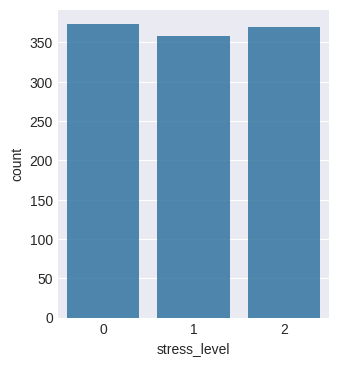

In [ ]:
#counting stress_level for each
plt.figure(1 , figsize = (14 , 10))
plt.subplot(2 , 3 , 1)
plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
sns.countplot(x = 'stress_level' , data = data , alpha = 0.85)

plt.show()

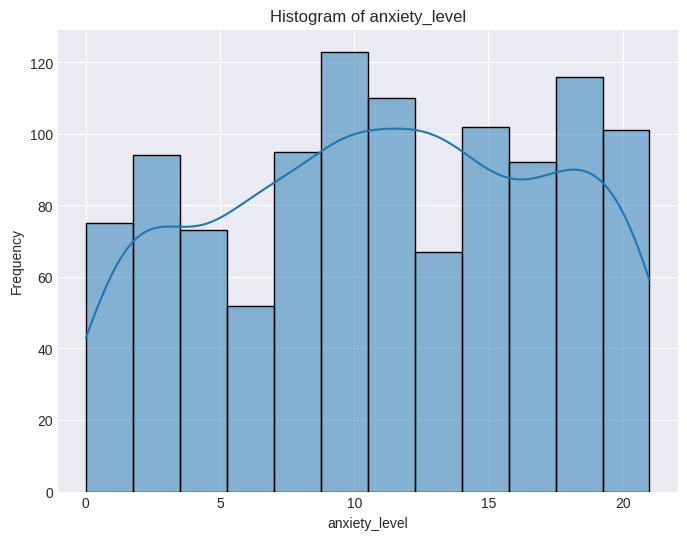

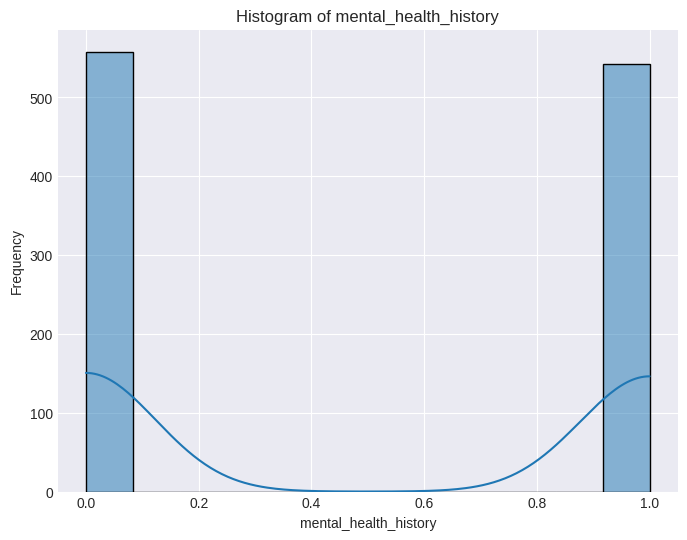

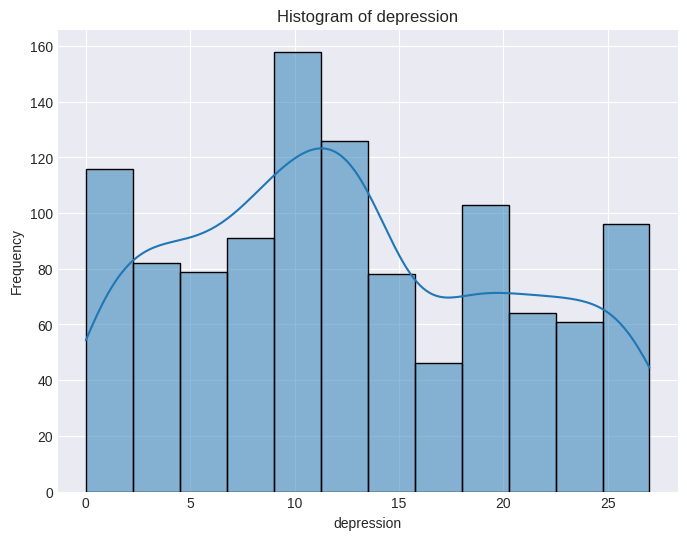

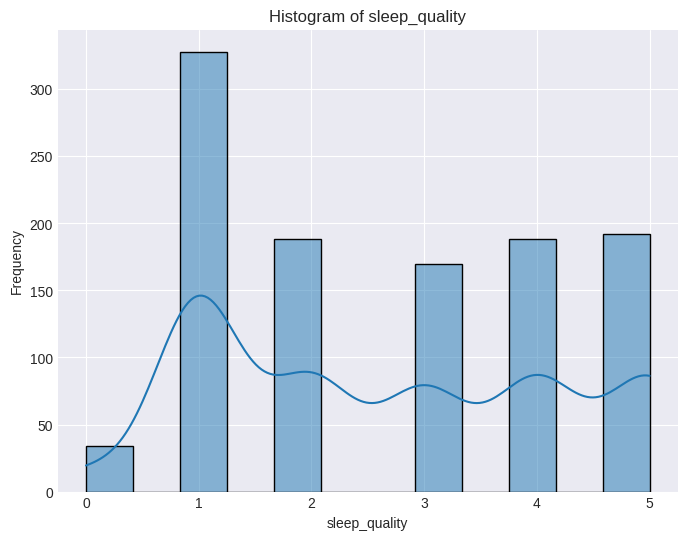

In [ ]:
# Histograms

continuous_cols = ['anxiety_level', 'mental_health_history', 'depression', 'sleep_quality']

for col in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


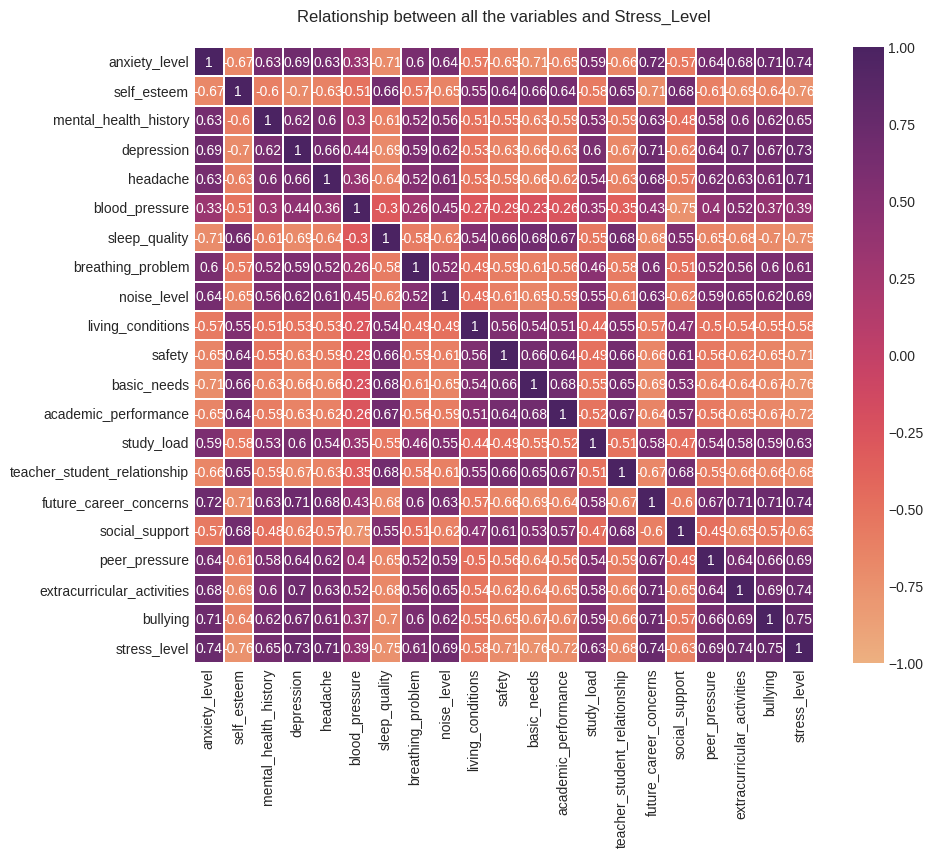

In [ ]:
#Heatmap

plt.figure(figsize=(10, 8))

sns.heatmap(data.corr(), vmin=-1, vmax=1, fmt='.2g', linewidths=0.009,
            linecolor='white', cmap='flare', annot=True)
plt.title("Relationship between all the variables and Stress_Level\n", fontsize=12)
plt.show()

# Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
# Separate features (x) and target (y)
x = data.drop(columns=['stress_level'])
y = data['stress_level']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

under_sampler = RandomUnderSampler(random_state=42)
x_train_resampled, y_train_resampled = under_sampler.fit_resample(x_train, y_train)



In [ ]:
# Data scaling
scaler = preprocessing.StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

In [ ]:
accuracy_list = [] #all models accuracy list

# Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train_resampled)
lr_prediction = lr_model.predict(x_test_scaled)
lr_precision = precision_score(y_test, lr_prediction, average='weighted')
lr_recall = recall_score(y_test, lr_prediction, average='weighted')
lr_f1 = f1_score(y_test, lr_prediction, average='weighted')

print(f'LR Accuracy Score: {(accuracy_score(y_test,lr_prediction))}')
print(f'LR precision     : {lr_precision}')
print(f'LR recall        : {lr_recall}')
print(f'LR f1 score      : {lr_f1}')
lr_accuracy = (round(accuracy_score(y_test,lr_prediction), 4) * 100)
accuracy_list.append(lr_accuracy)


LR Accuracy Score: 0.8757575757575757
LR precision     : 0.8758158066122667
LR recall        : 0.8757575757575757
LR f1 score      : 0.8757376664216288


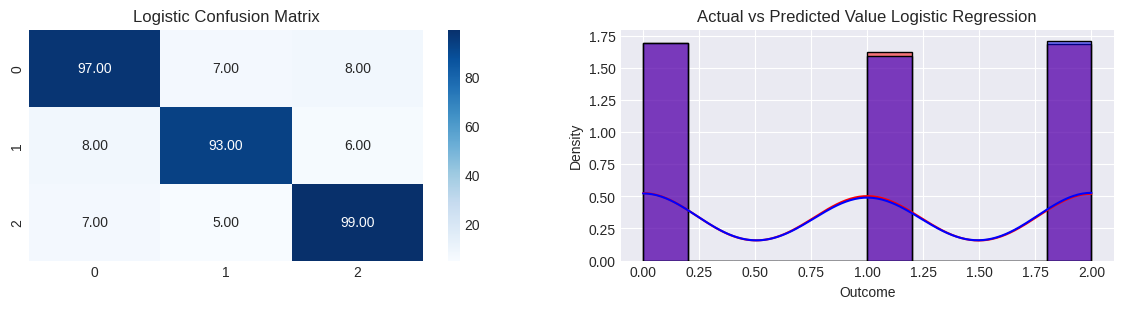

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
cf_matrix = confusion_matrix(y_test, lr_prediction)
sns.heatmap(cf_matrix, annot = True, fmt=".2f", cmap="Blues")
plt.title('Logistic Confusion Matrix')

plt.subplot(1,2,2)

sns.histplot(y_test, color='r', label='Actual Value', kde=True, stat="density", common_norm=False)
sns.histplot(lr_prediction, color='b', label='Predicted Value', kde=True, stat="density", common_norm=False)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Density')
plt.show()

# Decision tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled, y_train_resampled)
dt_prediction = dt_model.predict(x_test_scaled)

dt_precision = precision_score(y_test, dt_prediction, average='weighted')
dt_recall = recall_score(y_test, dt_prediction, average='weighted')
dt_f1 = f1_score(y_test, dt_prediction, average='weighted')

print(f'DT Accuracy Score: {(accuracy_score(y_test, dt_prediction))}')
print(f'DT precision     : {dt_precision}')
print(f'DT recall        : {dt_recall}')
print(f'DT f1 score      : {dt_f1}')
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100)
accuracy_list.append(dt_accuracy)


DT Accuracy Score: 0.8757575757575757
DT precision     : 0.8775569251840438
DT recall        : 0.8757575757575757
DT f1 score      : 0.8760691860142488


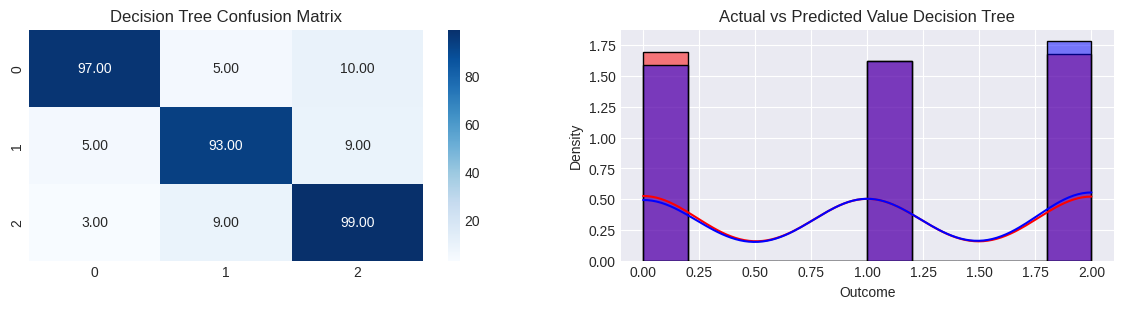

In [ ]:
cf_matrix = confusion_matrix(y_test, dt_prediction)
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
sns.heatmap(cf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Decision Tree Confusion Matrix')

plt.subplot(1, 2, 2)

sns.histplot(y_test, color='r', label='Actual Value', kde=True, stat="density", common_norm=False)
sns.histplot(dt_prediction, color='b', label='Predicted Value', kde=True, stat="density", common_norm=False)
plt.title('Actual vs Predicted Value Decision Tree')
plt.xlabel('Outcome')
plt.ylabel('Density')
plt.show()

# Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train_resampled)
nb_prediction = nb_model.predict(x_test_scaled)
nb_precision = precision_score(y_test, nb_prediction, average='weighted')
nb_recall = recall_score(y_test, nb_prediction, average='weighted')
nb_f1 = f1_score(y_test, nb_prediction, average='weighted')

print(f'NB Accuracy Score: {(accuracy_score(y_test, nb_prediction))}')
print(f'NB precision     : {nb_precision}')
print(f'NB recall        : {nb_recall}')
print(f'NB f1 score      : {nb_f1}')
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100)
accuracy_list.append(nb_accuracy)



NB Accuracy Score: 0.8818181818181818
NB precision     : 0.9007072660844422
NB recall        : 0.8818181818181818
NB f1 score      : 0.8837551891657313


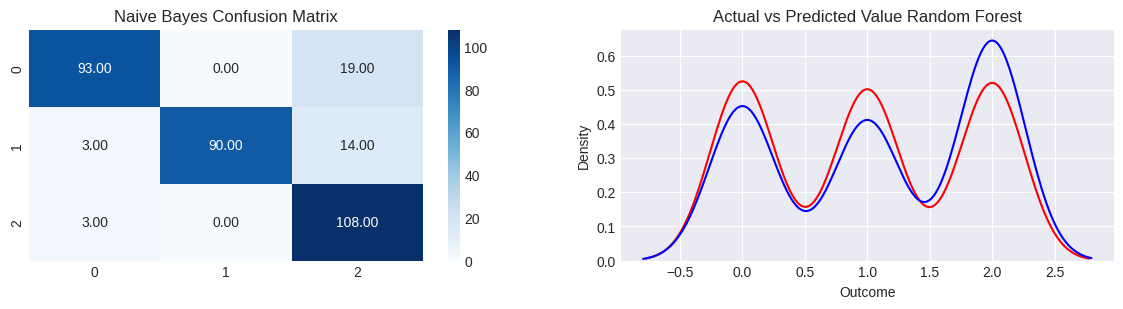

In [ ]:
cf_matrix = confusion_matrix(y_test, nb_prediction)
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
sns.heatmap(cf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Naive Bayes Confusion Matrix')

plt.subplot(1, 2, 2)

sns.kdeplot(y_test, color='r', label='Actual Value', common_norm=False)
sns.kdeplot(nb_prediction, color='b', label='Predicted Value', common_norm=False)

plt.title('Actual vs Predicted Value Random Forest')
plt.xlabel('Outcome')
plt.ylabel('Density')
plt.show()

# Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train_resampled)
rf_prediction = rf_model.predict(x_test_scaled)

rf_precision = precision_score(y_test, rf_prediction, average='weighted')
rf_recall = recall_score(y_test, rf_prediction, average='weighted')
rf_f1 = f1_score(y_test, rf_prediction, average='weighted')

print(f'RF Accuracy Score: {(accuracy_score(y_test, rf_prediction))}')
print(f'RF precision     : {rf_precision}')
print(f'RF recall        : {rf_recall}')
print(f'RF f1 score      : {rf_f1}')
rf_accuracy = (round(accuracy_score(y_test, rf_prediction), 4) * 100)
accuracy_list.append(rf_accuracy)

RF Accuracy Score: 0.8727272727272727
RF precision     : 0.8730580160498176
RF recall        : 0.8727272727272727
RF f1 score      : 0.8727311207311207


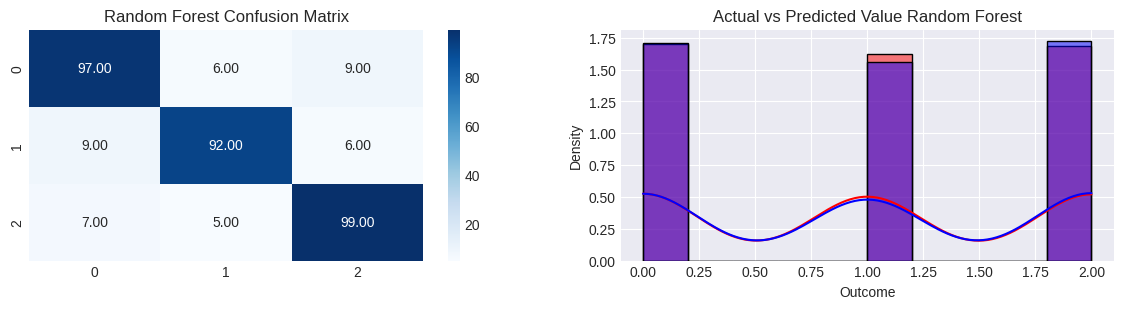

In [ ]:
cf_matrix = confusion_matrix(y_test, rf_prediction)
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
sns.heatmap(cf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Random Forest Confusion Matrix')

plt.subplot(1, 2, 2)

sns.histplot(y_test, color='r', label='Actual Value', kde=True, stat="density", common_norm=False)
sns.histplot(rf_prediction, color='b', label='Predicted Value', kde=True, stat="density", common_norm=False)

plt.title('Actual vs Predicted Value Random Forest')
plt.xlabel('Outcome')
plt.ylabel('Density')
plt.show()

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(x_train_scaled, y_train_resampled)

knn_prediction = knn.predict(x_test_scaled)

knn_accuracy = accuracy_score(y_test, knn_prediction)
knn_precision = precision_score(y_test, knn_prediction, average='weighted')
knn_recall = recall_score(y_test, knn_prediction, average='weighted')
knn_f1 = f1_score(y_test, knn_prediction, average='weighted')

print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print(f"KNN Precision: {knn_precision}")
print(f"KNN Recall: {knn_recall}")
print(f"KNN F1-score: {knn_f1}")

KNN Accuracy: 86.97%
KNN Precision: 0.8737041250570662
KNN Recall: 0.8696969696969697
KNN F1-score: 0.8700996252509899


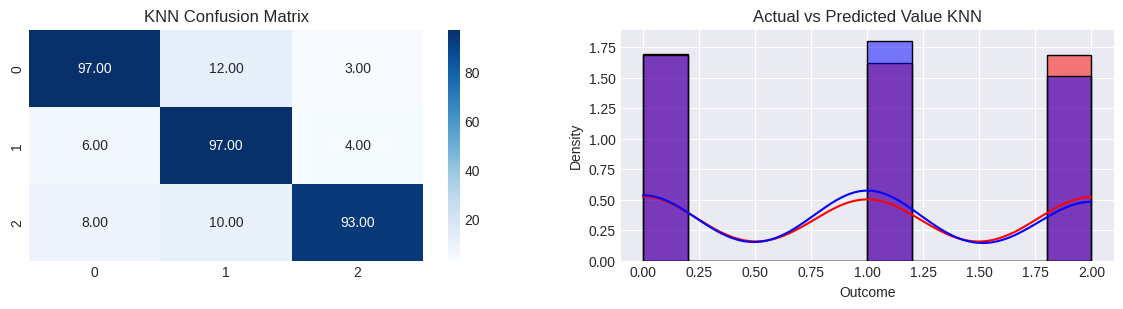

In [ ]:
cf_matrix = confusion_matrix(y_test, knn_prediction)
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
sns.heatmap(cf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('KNN Confusion Matrix')
plt.subplot(1, 2, 2)
sns.histplot(y_test, color='r', label='Actual Value', kde=True, stat="density", common_norm=False)
sns.histplot(knn_prediction, color='b', label='Predicted Value', kde=True, stat="density", common_norm=False)

plt.title('Actual vs Predicted Value KNN')
plt.xlabel('Outcome')
plt.ylabel('Density')
plt.show()

# Accuracy result

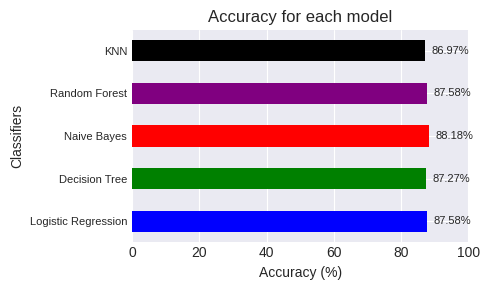

In [ ]:
accuracy_list = [lr_accuracy, dt_accuracy, nb_accuracy, rf_accuracy, knn_accuracy * 100]
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'KNN']
colors = ['blue', 'green', 'red', 'purple', 'black']

plt.figure(figsize=(5, 3))
bar_height = 0.5

y_pos = np.arange(len(models))
plt.barh(y_pos, accuracy_list, color=colors, height=bar_height)

plt.ylabel("Classifiers", fontsize=10)
plt.xlabel("Accuracy (%)", fontsize=10)
plt.title("Accuracy for each model", fontsize=12)
plt.yticks(y_pos, models, fontsize=8)

plt.xlim(0, 100)

for i, v in enumerate(accuracy_list):
    plt.text(v + 2, i, f'{v:.2f}%', va='center', fontsize=8)

plt.tight_layout()
plt.show()

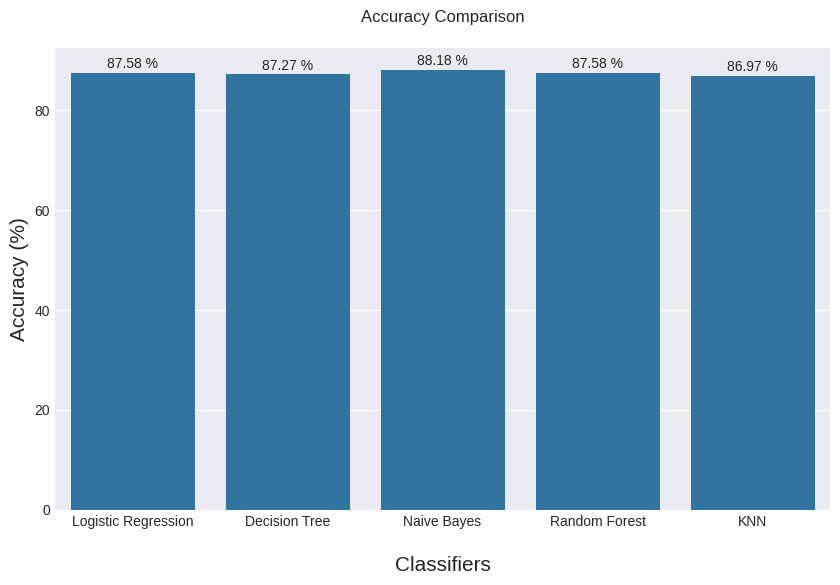

In [ ]:

plt.figure(figsize=(10,6))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("\nClassifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.title("Accuracy Comparison\n")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height:.2f} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()

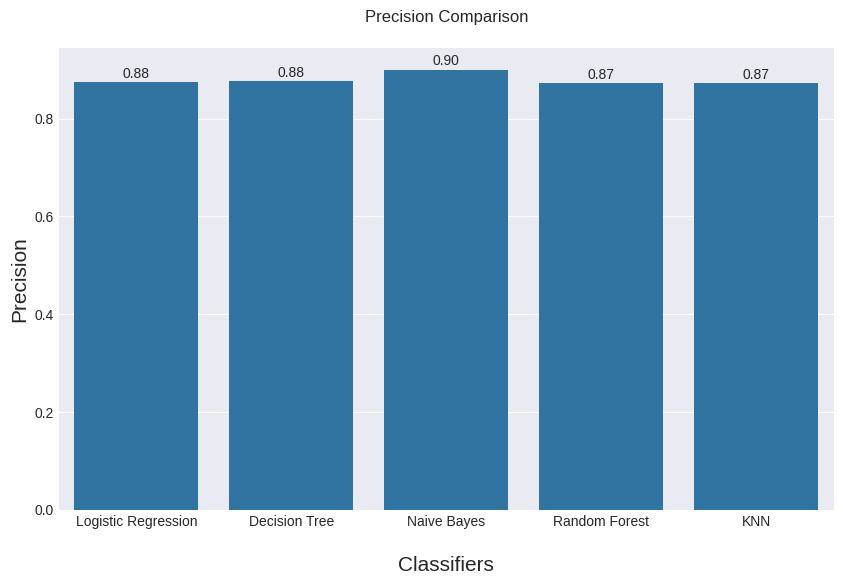

In [ ]:
precision_list = [lr_precision, dt_precision, nb_precision, rf_precision, knn_precision]
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'KNN']


plt.figure(figsize=(10,6))
ax = sns.barplot(x=models, y=precision_list )
plt.xlabel("\nClassifiers", fontsize=15)
plt.ylabel("Precision", fontsize=15)
plt.title("Precision Comparison\n")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height:.2f}", (x + width/2, y+ height*1.01), ha="center")
plt.show()

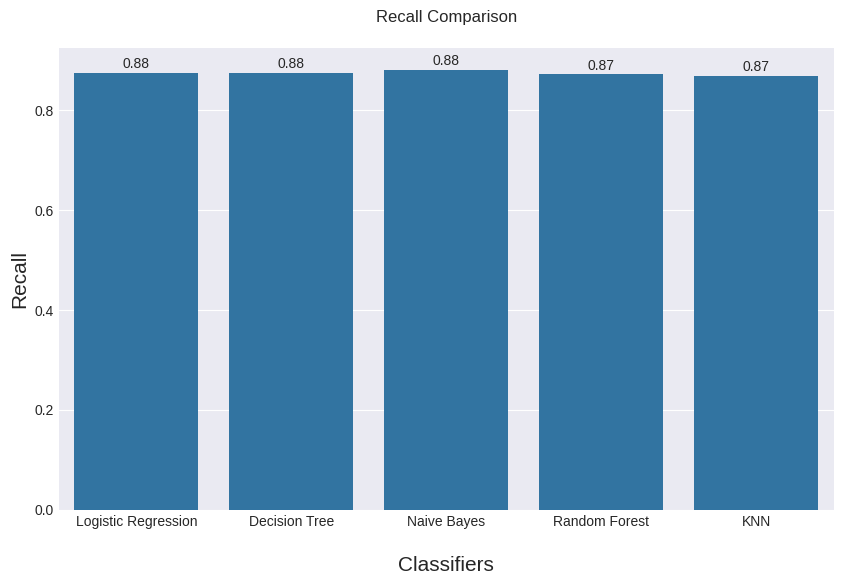

In [ ]:

recall_list = [lr_recall, dt_recall, nb_recall, rf_recall, knn_recall]
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'KNN']

plt.figure(figsize=(10,6))
ax = sns.barplot(x=models, y=recall_list)
plt.xlabel("\nClassifiers", fontsize=15)
plt.ylabel("Recall", fontsize=15)
plt.title("Recall Comparison\n")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height:.2f}", (x + width/2, y+ height*1.01), ha="center")
plt.show()